In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.kde import gaussian_kde

from sklearn.linear_model import LinearRegression

C:\Users\user\AppData\Local\Temp\ipykernel_3420\3576638214.py:5: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


Create random variable

In [18]:
np.random.seed(123)
height = np.random.normal(160, 5, 1000)
weight = np.random.exponential(1 / 50, 1000)
age = np.random.uniform(30, 60, 1000) + height * 0.01 + weight * 0.08

features = [height, weight, age]
features_names = ["height", "weight", "age"]

Visualization

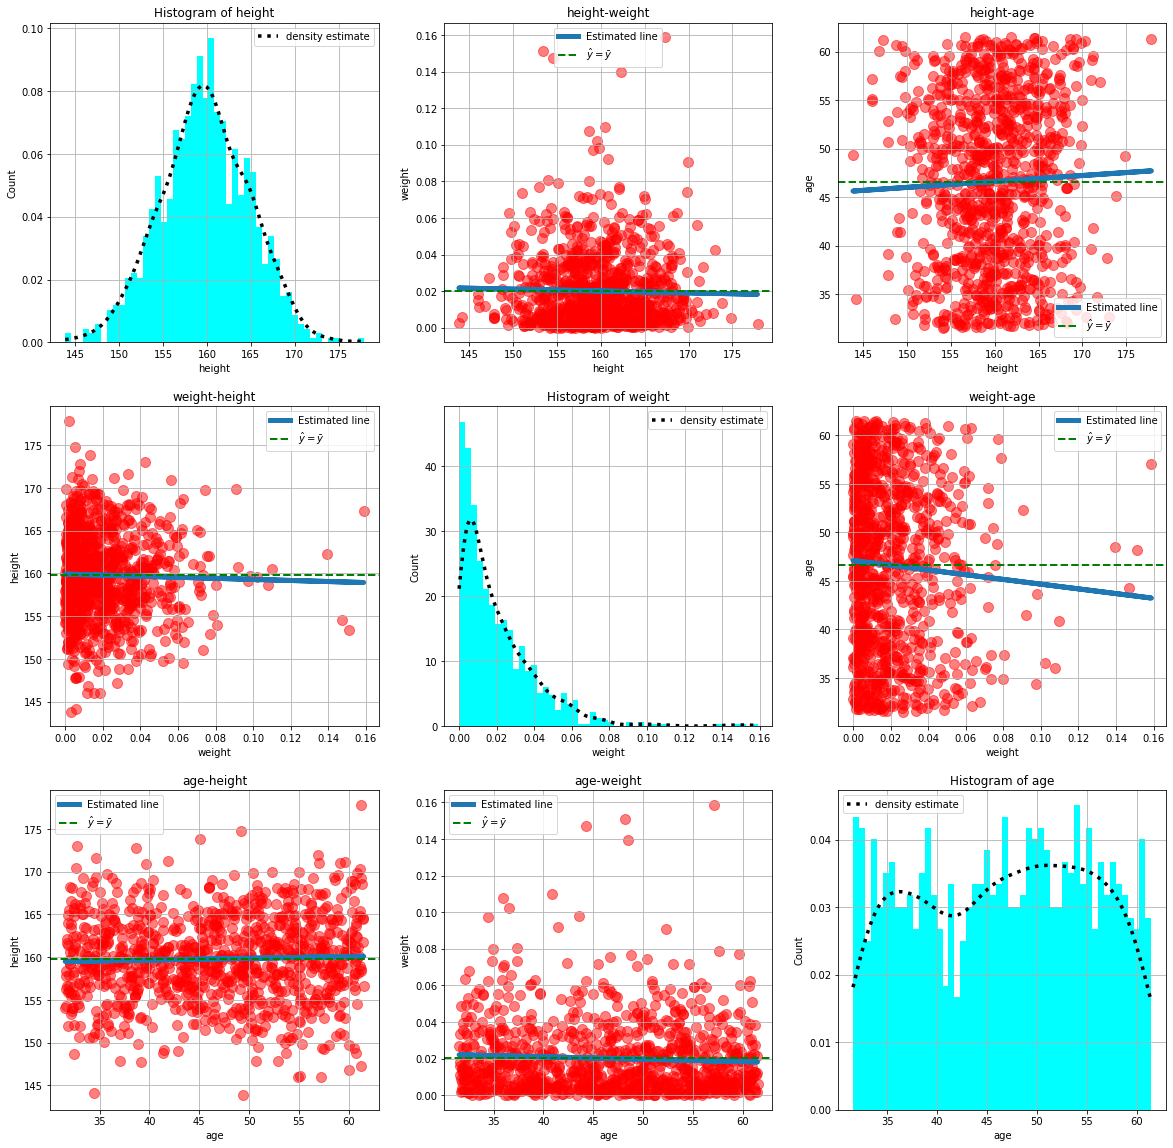

In [65]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))
for i in range(3):
    for j in range(3):
        if i == j:
            #hist
            ax[i, j].hist(features[i], bins=50, density=True, color = "cyan" )
            ax[i, j].set_title(f"Histogram of {features_names[i]}")
            ax[i, j].set_xlabel(features_names[i])
            ax[i, j].set_ylabel("Count")

            # Estimate and plot density
            density_model = gaussian_kde(features[i])
            x = np.linspace(min(features[i]), max(features[i]), 1000)
            ax[i, j].plot(x, density_model(x), label="density estimate",
                          linestyle="dotted", linewidth=3.5, color="black")

            ax[i, j].legend()
        else:
            ax[i, j].scatter(features[i], features[j], color = "red", s =100, alpha=0.5)
            ax[i, j].set_title(str(features_names[i]) + "-" + str(features_names[j]))
            ax[i, j].set_xlabel(features_names[i])
            ax[i, j].set_ylabel(features_names[j])

            model = LinearRegression()
            model.fit(features[i].reshape(-1, 1), features[j].reshape(-1, 1))
            y_hat = model.predict(features[i].reshape(-1, 1))

            ax[i, j].plot(features[i], y_hat, label="Estimated line",
                          linewidth=5)



            ax[i, j].axhline(np.mean(features[j]), c = "green", linestyle="--", linewidth=2,
                             label= r"$\hat{y} = \bar{y}$")
            ax[i, j].legend()

        ax[i, j].set_facecolor("white")
        ax[i, j].grid()



